# User's Guide, Chapter 46: Streams 3: Manipulation, inPlace, and deepcopy

**(This chapter is a work in progress)**

## Replace all consecutive notes of a Stream with intervals while maintaining the hierarchy

In [2]:
from music21 import *
import copy

def intervalStream(inputStream):
    out = copy.deepcopy(inputStream)
    for n in out[note.Note]:
        nNext = n.next(note.GeneralNote)
        if nNext is None or not isinstance(nNext, note.Note):
            continue # Rests, Chords, etc.
        n.activeSite.replace(n, interval.Interval(n, nNext))
    for other in out.recurse().getElementsNotOfClass([interval.Interval,
                                                      stream.Stream]):
        other.activeSite.remove(other)  # get rid of everything that is not an Interval or Stream
    return out

In [3]:
b = corpus.parse('bwv66.6')
ints = intervalStream(b.measures(0, 4))
ints.show('text')

{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.interval.Interval M-2>
        {0.5} <music21.interval.Interval M-2>
    {1.0} <music21.stream.Measure 1 offset=1.0>
        {0.0} <music21.interval.Interval M2>
        {1.0} <music21.interval.Interval M2>
        {2.0} <music21.interval.Interval m3>
        {3.0} <music21.interval.Interval m-3>
    {5.0} <music21.stream.Measure 2 offset=5.0>
        {0.0} <music21.interval.Interval M-2>
        {1.0} <music21.interval.Interval M-2>
        {2.0} <music21.interval.Interval M3>
        {3.0} <music21.interval.Interval M-3>
    {9.0} <music21.stream.Measure 3 offset=9.0>
        {0.0} <music21.interval.Interval M2>
        {0.5} <music21.interval.Interval m-3>
        {1.0} <music21.interval.Interval M-2>
        {2.0} <music21.interval.Interval m3>
        {3.0} <music21.interval.Interval M2>
    {13.0} <music21.stream.Measure 4 offset=13.0>
        {0.0} <music21.interval.Interva

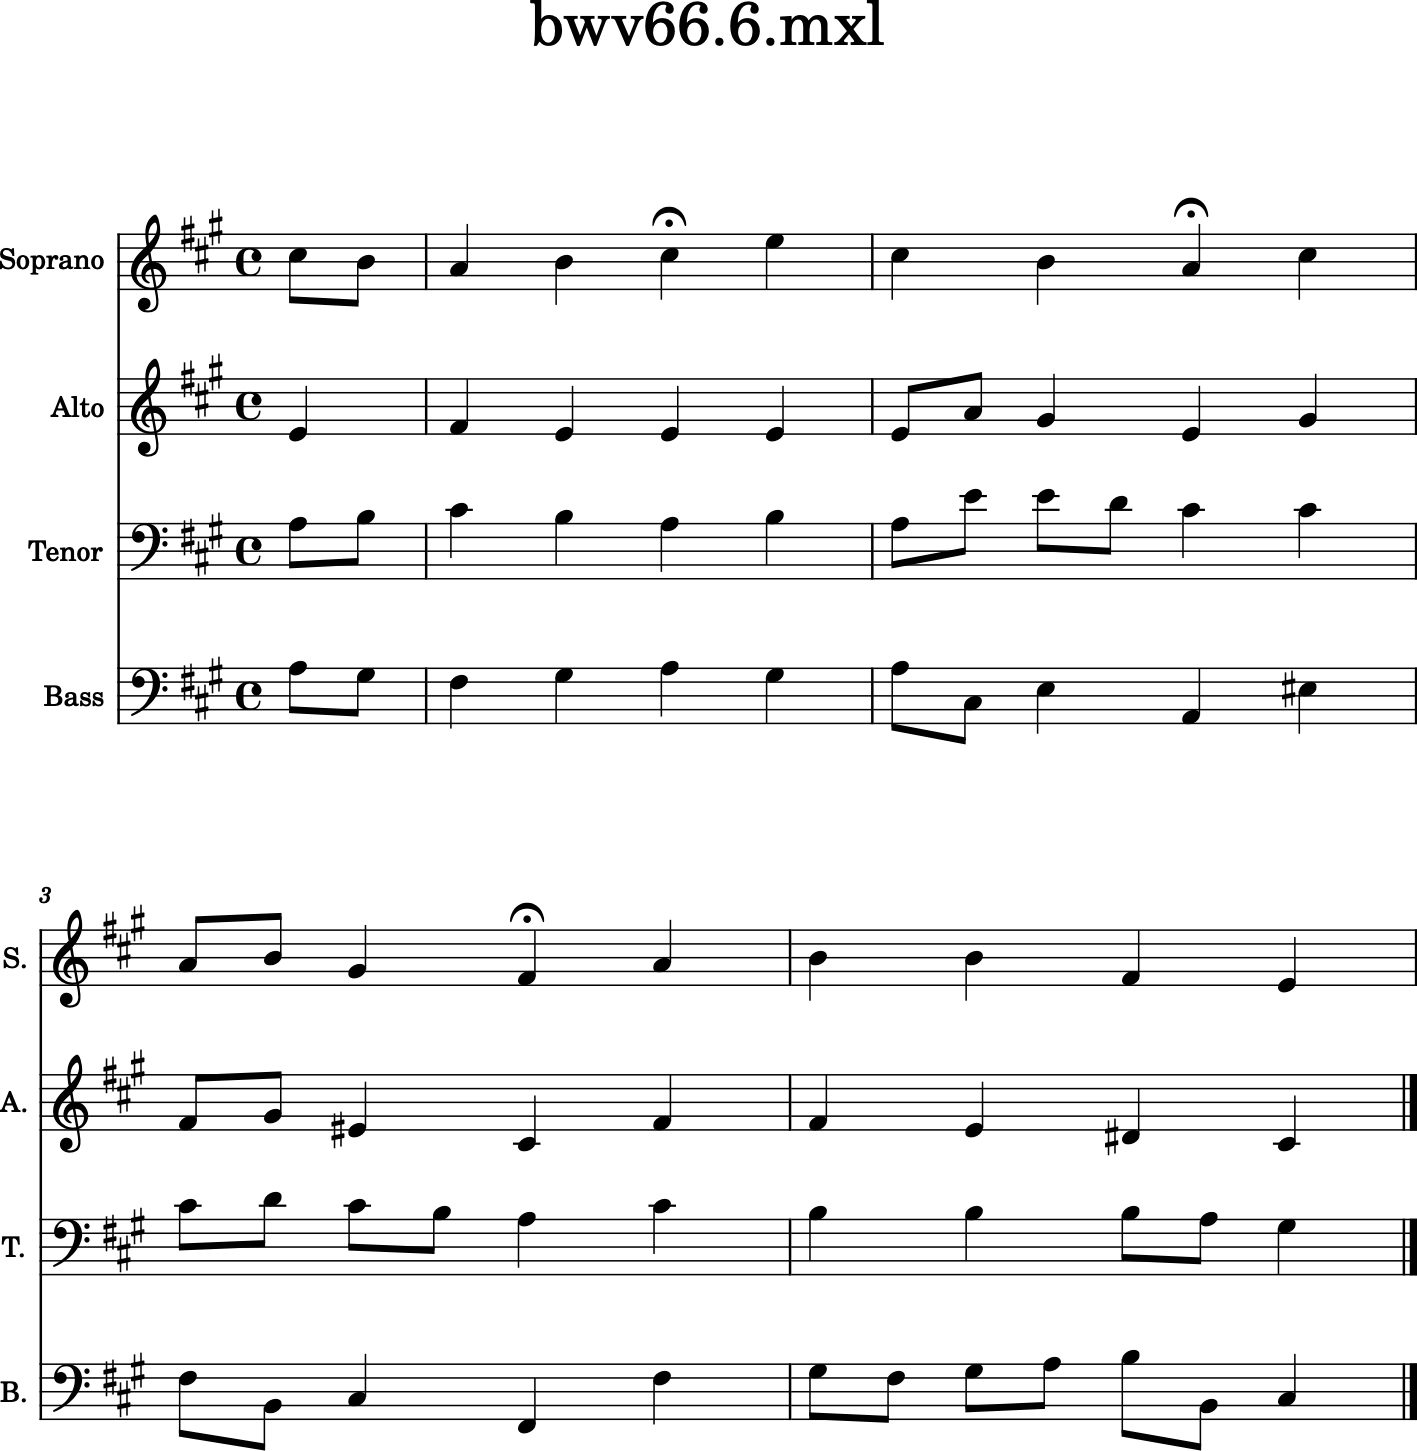

In [4]:
b.measures(0, 4).show()